# Assignment 3: sklearn  
## **Group 29**

### Members:
- **Dhruv Panchal** (ID: 202411042)
- **Priya Patel** (ID: 202411048)
- **Natansh Shah** (ID: 202201445)

### *Task: Use the scikit-learn package to load your data, preprocess data, train your model, evaluate it, and make predictions. Explain the sublibraries and corresponding functions in each of them that you use in the analysis.*


## Installing Required package

In [4]:
## To run the ipynb file install pre-requisites 

In [5]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


## Importing libraries

In [104]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

## Reading the dataset

In [2]:
from sklearn.datasets import load_wine

In [3]:
## reading the dataset 
## loading the dataset by using the api call (for loading it may take some time and internet connection is mandatory)
wine_data = load_wine()

In [4]:
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
wine_df['target'] = wine_data.target

In [5]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Basic information about the dataset

In [6]:
## total samples in the dataset
len(wine_df)

178

In [7]:
# basic information of the dataset
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [8]:
# Getting dimensions of the dataset
print("Number of rows" , wine_df.shape[0])
print("Number of columns" , wine_df.shape[1])
print("Total cells" , (wine_df.shape[0]*wine_df.shape[1]))

Number of rows 178
Number of columns 14
Total cells 2492


In [9]:
wine_df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [10]:
wine_df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int32
dtype: object

In [11]:
wine_df.select_dtypes("number").shape

(178, 14)

In [12]:
wine_df.select_dtypes("number").head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [13]:
wine_df.select_dtypes(exclude="number").shape

(178, 0)

In [14]:
wine_df.select_dtypes(exclude="number").head(5)

""
0
1
2
3
4


### Dataset contaning only numerical type of features.

### Missing Values 

In [15]:
# Getting Number of missing values for each coloumns
print("Getting Number of missing values for each coloumns.")
print(wine_df.isnull().sum(),end="\n\n")

print("Below is shown the set of columns which have missing values.")
columns_with_nulls = wine_df.columns[wine_df.isnull().sum() > 0]
print(columns_with_nulls)

Getting Number of missing values for each coloumns.
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

Below is shown the set of columns which have missing values.
Index([], dtype='object')


### Data set is not contaning any missing values.

### Percentage of missing values for columns

In [16]:
def getPerMiss(df):
    percentage_missing = (wine_df.isnull().sum() / wine_df.shape[0]) * 100

    # Filter columns with more than 0% missing data
    columns_with_missing = percentage_missing[percentage_missing > 0]
    return columns_with_missing

columns_with_missing = getPerMiss(wine_df)
print(columns_with_missing)

Series([], dtype: float64)


In [17]:
wine_df.shape

(178, 14)

### check for duplicated values  

In [18]:
wine_df[wine_df.duplicated()]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target


In [19]:
### Dataset is not contaning any duplicated values 

In [20]:
wine_df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


In [21]:
wine_df.tail(4)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


### Statistical information

In [22]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


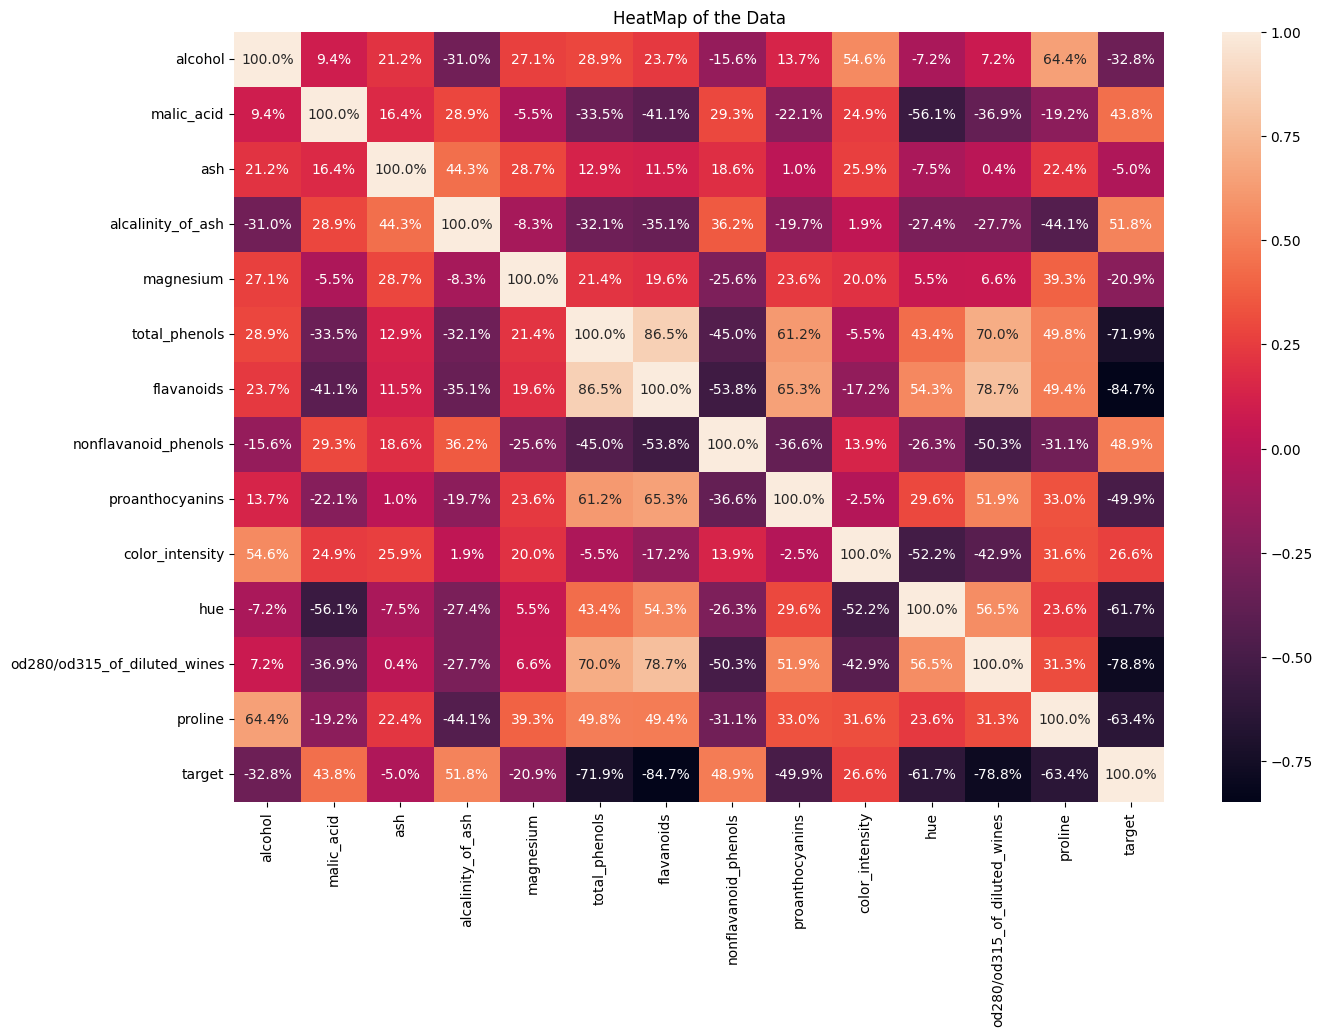

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(wine_df.corr(),annot=True, fmt=".1%")
plt.title("HeatMap of the Data")
plt.show()

### We can see that in our dataset no two features are correlated. 

### Outlier Detection

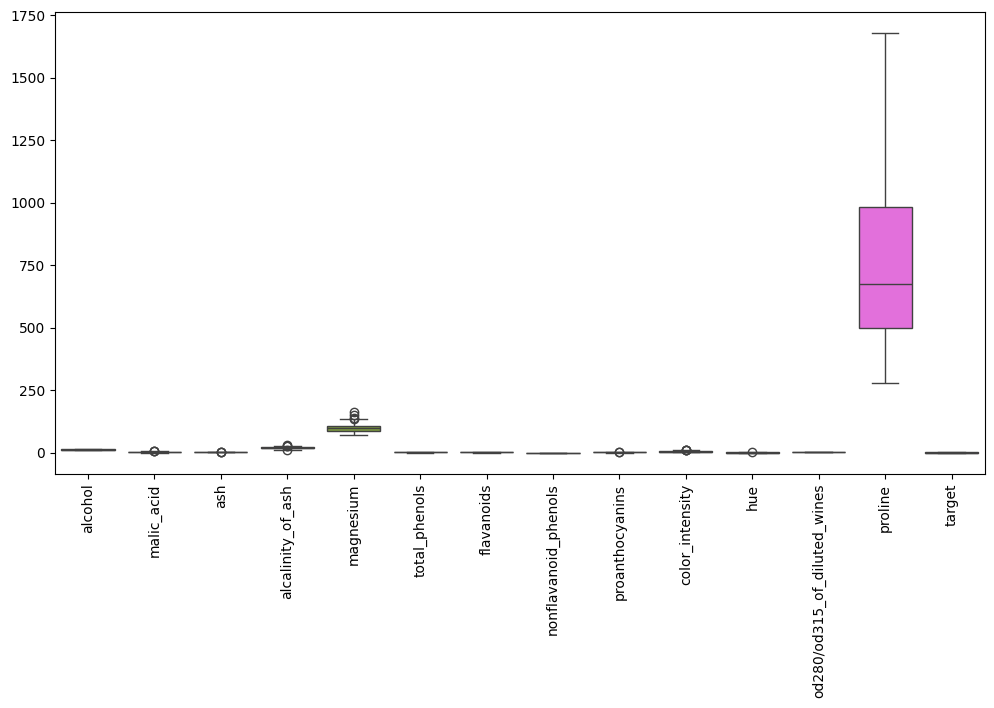

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=wine_df)
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='malic_acid'>

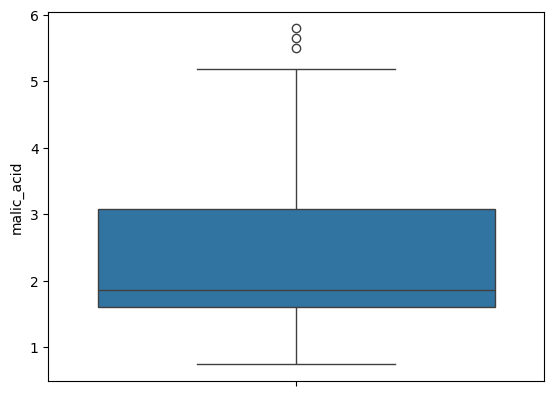

In [25]:
sns.boxplot(wine_df["malic_acid"])

<Axes: ylabel='ash'>

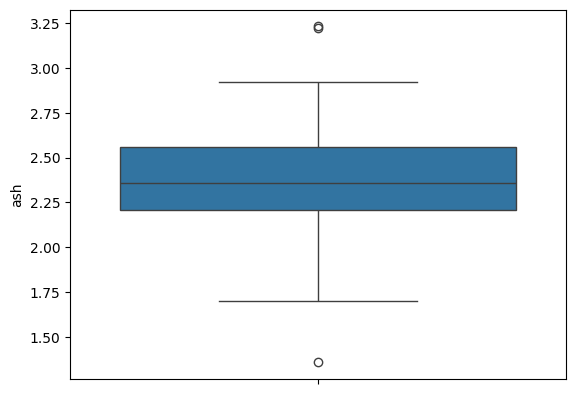

In [26]:
sns.boxplot(wine_df["ash"])

<Axes: ylabel='alcalinity_of_ash'>

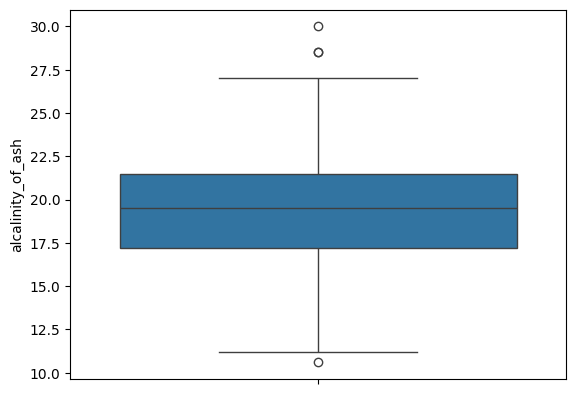

In [27]:
sns.boxplot(wine_df["alcalinity_of_ash"])

<Axes: ylabel='magnesium'>

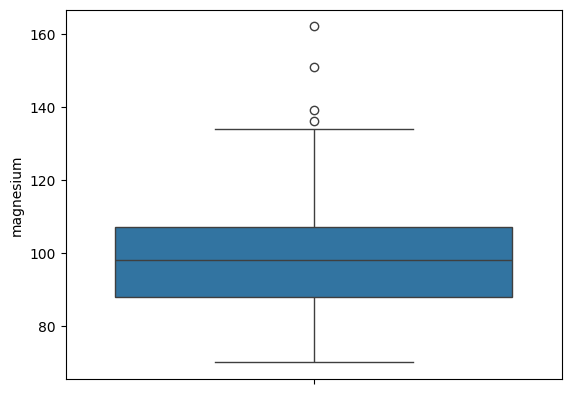

In [28]:
sns.boxplot(wine_df["magnesium"])

<Axes: >

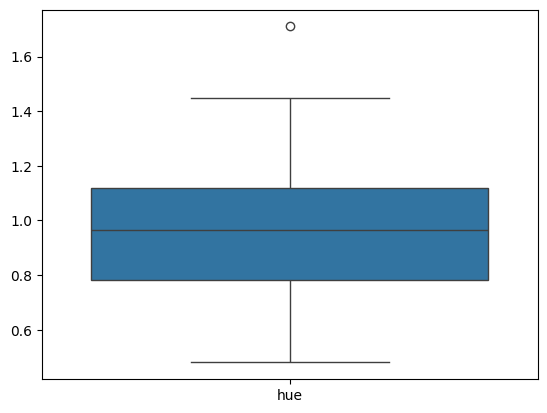

In [29]:
sns.boxplot(wine_df[["hue"]])

<Axes: ylabel='proanthocyanins'>

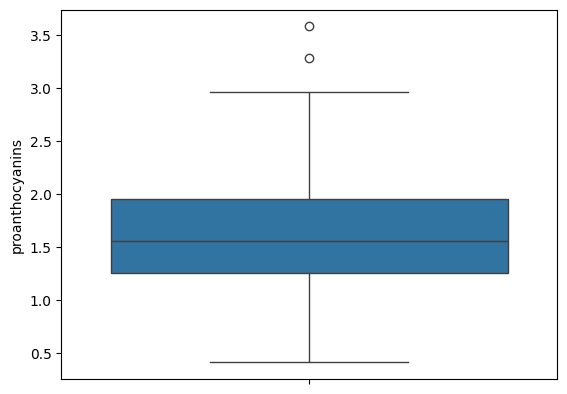

In [30]:
sns.boxplot(wine_df["proanthocyanins"])

<Axes: ylabel='color_intensity'>

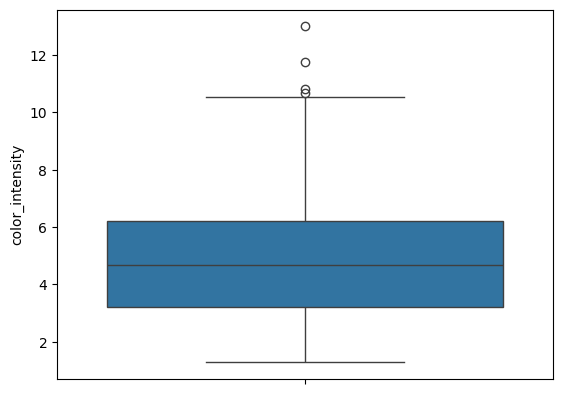

In [31]:
sns.boxplot(wine_df["color_intensity"])

### We can see that some features are containing the outliers so we have to handle them 

In [32]:
for col in ["color_intensity","proanthocyanins","malic_acid","ash","alcalinity_of_ash","magnesium","hue"]:
    
    if wine_df[col].dtype in ['int64', 'float64']:
        q1 = wine_df[col].quantile(0.25)
        q3 = wine_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        wine_df = wine_df[(wine_df[col] >= lower_bound) & (wine_df[col] <= upper_bound)]


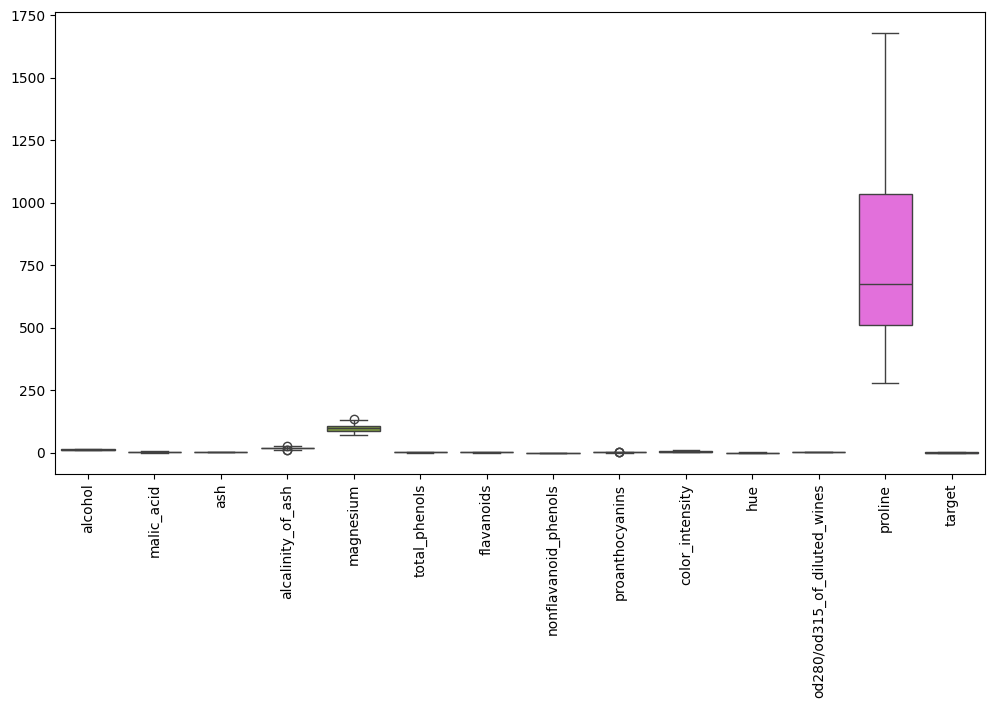

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=wine_df)
plt.xticks(rotation=90)
plt.show()

### Handle the outliers in dataset

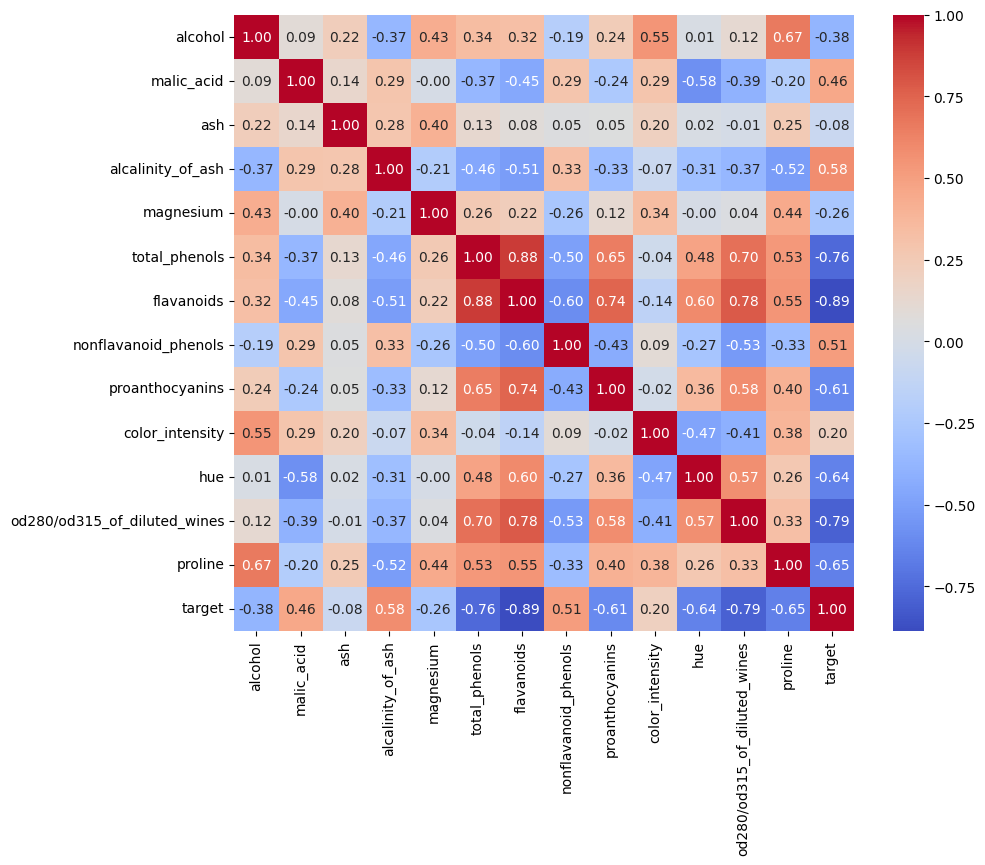

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(wine_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


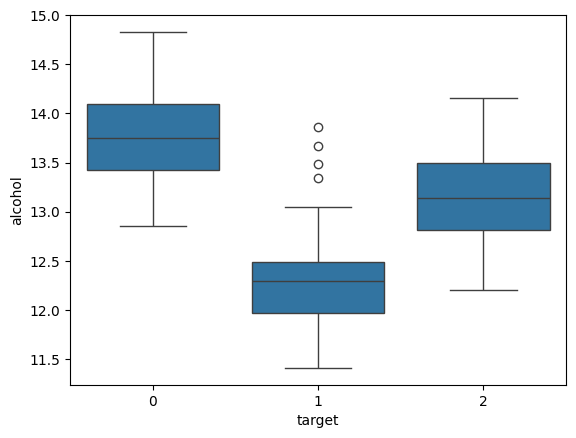

In [35]:
sns.boxplot(x='target', y='alcohol', data=wine_df)
plt.show()

### Seprate the dataset into dependent and independent part

In [36]:
X = wine_df.drop('target', axis=1)
y = wine_df['target']

In [37]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [38]:
X.shape

(158, 13)

In [39]:
y

0      0
1      0
2      0
3      0
4      0
      ..
172    2
174    2
175    2
176    2
177    2
Name: target, Length: 158, dtype: int32

In [40]:
y.shape

(158,)

In [41]:
y.unique()

array([0, 1, 2])

### Split the dataset into train and test split 

### train_test_split() : This function splits the dataset into training and testing sets, ensuring the model is trained on one part of the data and evaluated on another part to prevent overfitting.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(126, 13) (32, 13) (126,) (32,)


In [43]:
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
153,13.23,3.30,2.28,18.5,98.0,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675.0
56,14.22,1.70,2.30,16.3,118.0,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970.0
141,13.36,2.56,2.35,20.0,89.0,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780.0
91,12.00,1.51,2.42,22.0,86.0,1.45,1.25,0.50,1.63,3.60,1.05,2.65,450.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,11.84,2.89,2.23,18.0,112.0,1.72,1.32,0.43,0.95,2.65,0.96,2.52,500.0
117,12.42,1.61,2.19,22.5,108.0,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345.0
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
101,12.60,1.34,1.90,18.5,88.0,1.45,1.36,0.29,1.35,2.45,1.04,2.77,562.0


In [44]:
X_test

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
143,13.62,4.95,2.35,20.0,92.0,2.00,0.80,0.47,1.02,4.40,0.91,2.05,550.0
46,14.38,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065.0
149,13.08,3.90,2.36,21.5,113.0,1.41,1.39,0.34,1.14,9.40,0.57,1.33,550.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0
98,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0
30,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0
105,12.42,2.55,2.27,22.0,90.0,1.68,1.84,0.66,1.42,2.70,0.86,3.30,315.0
107,12.72,1.75,2.28,22.5,84.0,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488.0
104,12.51,1.73,1.98,20.5,85.0,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672.0
156,13.84,4.12,2.38,19.5,89.0,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480.0


In [45]:
y_train

153    2
56     0
141    2
91     1
174    2
      ..
77     1
117    1
14     0
101    1
112    1
Name: target, Length: 126, dtype: int32

In [46]:
y_test

143    2
46     0
149    2
176    2
98     1
30     0
105    1
107    1
104    1
156    2
19     0
57     0
15     0
74     1
24     0
31     0
136    2
120    1
102    1
68     1
169    2
18     0
12     0
9      0
32     0
88     1
52     0
155    2
140    2
164    2
163    2
82     1
Name: target, dtype: int32

In [48]:
y_train.unique(), y_test.unique()

(array([2, 0, 1]), array([2, 0, 1]))

### Our target feature contain 3 type of classes categories are : 0, 1, 2

In [50]:
X_train.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
153,13.23,3.30,2.28,18.5,98.0,1.8,0.83,0.61,1.87,10.52,0.56,1.51,675.0
56,14.22,1.70,2.30,16.3,118.0,3.2,3.00,0.26,2.03,6.38,0.94,3.31,970.0
141,13.36,2.56,2.35,20.0,89.0,1.4,0.50,0.37,0.64,5.60,0.70,2.47,780.0


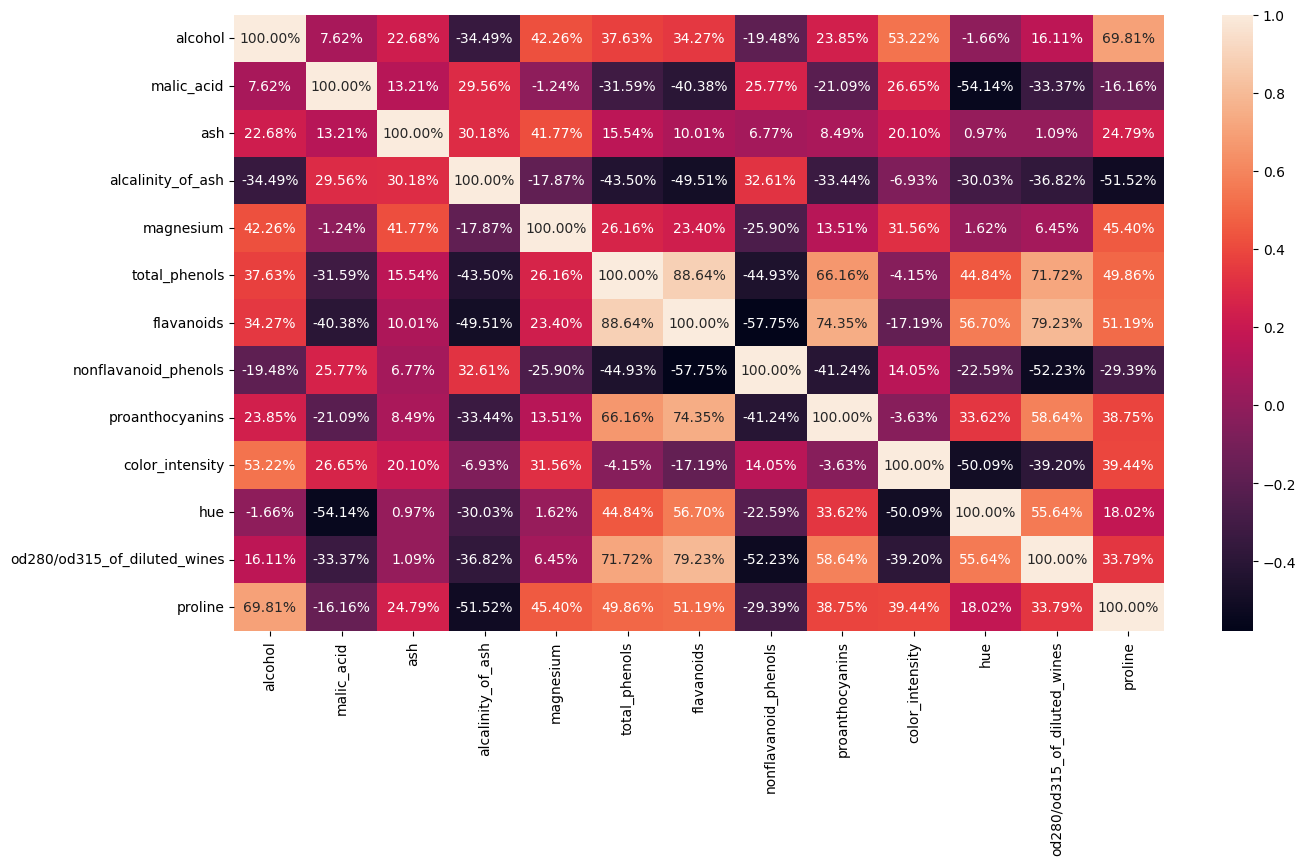

In [53]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train.corr(), annot=True, fmt="0.2%")
plt.show()

### Scale the dataset

### StandardScaler() : This function standardizes the dataset by scaling features to have a mean of 0 and a standard deviation of 1, which is often important for models like logistic regression.

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [59]:
scaler.fit(X_train)

StandardScaler()

In [60]:
scaler.transform(X_train)

array([[ 0.25189798,  1.02401668, -0.36045349, ..., -1.83924684,
        -1.57788632, -0.21554371],
       [ 1.47074024, -0.58453687, -0.27476077, ..., -0.08974075,
         0.96701922,  0.70810856],
       [ 0.41194797,  0.28006066, -0.06052898, ..., -1.19469196,
        -0.22060336,  0.11321388],
       ...,
       [ 1.66772485, -0.41362805,  0.06801009, ...,  1.10728974,
         0.52872993,  2.51470977],
       [-0.52372892, -0.94646142, -1.98861508, ...,  0.37065559,
         0.20354756, -0.5693495 ],
       [-1.55789812,  0.40070218,  2.38171341, ...,  1.24540864,
        -0.17818827, -0.42845339]])

In [61]:
scaler.get_feature_names_out()

array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'], dtype=object)

In [62]:
X_train_norm = pd.DataFrame(scaler.transform(X_train), columns = scaler.get_feature_names_out())
X_test_norm = pd.DataFrame(scaler.transform(X_test), columns = scaler.get_feature_names_out())

In [63]:
X_train_norm.shape

(126, 13)

In [64]:
X_train_norm.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.251898,1.024017,-0.360453,-0.236828,-0.059974,-0.769392,-1.245549,2.109137,0.575351,2.709120,-1.839247,-1.577886,-0.215544
1,1.470740,-0.584537,-0.274761,-0.951954,1.514352,1.527845,1.011147,-0.810290,0.867961,0.707328,-0.089741,0.967019,0.708109
2,0.411948,0.280061,-0.060529,0.250759,-0.768421,-1.425746,-1.588733,0.107244,-1.674090,0.330178,-1.194692,-0.220603,0.113214
3,-1.262421,-0.775553,0.239396,0.900874,-1.004570,-1.343702,-0.808769,1.191603,0.136435,-0.636871,0.416695,0.033887,-0.920024
4,0.461194,1.637278,0.496474,1.225931,0.254891,-0.769392,-1.328745,0.607717,-0.265904,1.152170,-1.194692,-1.507194,0.019283


In [65]:
X_test_norm.head(4)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.732048,2.682838,-0.060529,0.250759,-0.532272,-0.441216,-1.276747,0.941366,-0.979141,-0.250051,-0.227860,-0.814415,-0.606922
1,1.667725,1.315567,-0.360453,-1.049471,0.254891,1.609890,1.187939,-0.726878,1.160571,-0.008289,0.370656,1.150818,1.005556
2,0.067225,1.627224,-0.017683,0.738345,1.120770,-1.409337,-0.663176,-0.142992,-0.759683,2.167572,-1.793207,-1.832377,-0.606922
3,0.178029,0.310221,0.025164,0.250759,1.671784,-1.015525,-1.401542,1.441839,-0.174463,2.119220,-1.655088,-1.422364,0.301075


### Create the logistic regression model. 

In [69]:
model = LogisticRegression(multi_class= "ovr")
model

LogisticRegression(multi_class='ovr')

### LogisticRegression() : This class is used to create and train a logistic regression model. It can be customized with various parameters like the type of regularization (e.g., L1, L2).

### Fit the train data to the model.

In [70]:
model.fit(X_train, y_train)

C:\Users\dhruv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr')

In [71]:
model.classes_

array([0, 1, 2])

In [73]:
y_predicted_test = model.predict(X_test)
y_predicted_train = model.predict(X_train)

In [74]:
y_predicted_train

array([2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 1, 2, 0, 1, 0, 2, 2, 0, 1, 1, 2, 0,
       1, 2, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0,
       0, 1, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 0, 1, 2,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 2, 1, 0, 1, 0, 2, 2, 0, 0,
       0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 2, 2, 0, 2,
       0, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 0, 1, 1])

In [75]:
y_predicted_test

array([2, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 2, 0,
       0, 0, 0, 1, 0, 2, 2, 2, 2, 1])

### see the confussion matrix.

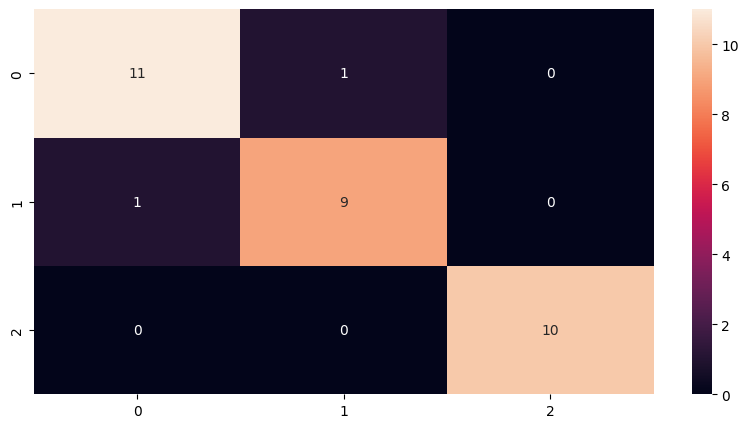

In [81]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_predicted_test, y_test), annot=True)
plt.show()

In [84]:
print("the classification report for test dataset : ")
print(classification_report(y_predicted_test, y_test))

the classification report for test dataset : 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.90      0.90      0.90        10
           2       1.00      1.00      1.00        10

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32



In [85]:
print("the classification report for train dataset : ")
print(classification_report(y_predicted_train, y_train))

the classification report for train dataset : 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       0.98      0.98      0.98        48
           2       1.00      0.97      0.98        33

    accuracy                           0.98       126
   macro avg       0.99      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



### Precision score, Recall score, f1 score of the model on the data

In [116]:
print(f"the precision score on train data: {precision_score(y_predicted_train, y_train, average = 'weighted') }")
print(f"the precision score on test data: {precision_score(y_predicted_test, y_test, average = 'weighted') }")

print(f"the recall score of the model on train data is : {recall_score(y_predicted_train, y_train, average = 'weighted')}")
print(f"the recall score of the model on test data is : {recall_score(y_predicted_test, y_test, average = 'weighted')}")

print(f"the f1 score of the model on train data : {f1_score(y_predicted_train, y_train, average = 'weighted')}")
print(f"the f1 score of the model on test data : {f1_score(y_predicted_test, y_test, average = 'weighted')}")

the precision score on train data: 0.9842995169082126
the precision score on test data: 0.9375
the recall score of the model on train data is : 0.9841269841269841
the recall score of the model on test data is : 0.9375
the f1 score of the model on train data : 0.9841095412523985
the f1 score of the model on test data : 0.9375


### Accuracy score for test and train data : 

In [86]:
print(f"accuracy score on train data : {accuracy_score(y_train, y_predicted_train)}")
print(f"accuracy score on test data : {accuracy_score(y_test, y_predicted_test)}")

accuracy score on train data : 0.9841269841269841
accuracy score on test data : 0.9375


In [90]:
print(f"accuracy score on train data in percentages : {accuracy_score(y_train, y_predicted_train)*100}%")
print(f"accuracy score on test data in percentages : {accuracy_score(y_test, y_predicted_test)*100}%")

accuracy score on train data in percentages : 98.4126984126984%
accuracy score on test data in percentages : 93.75%


In [91]:
model

LogisticRegression(multi_class='ovr')

### accuracy_score() : Computes the accuracy of the model, which is the ratio of correct predictions to total predictions.
### precision_score() : Calculates precision, which is the ratio of true positive predictions to the total number of predicted positives.
### recall_score() : Computes recall, which is the ratio of true positives to the total number of actual positives.
### f1_score() : Combines precision and recall into a single metric using the harmonic mean.
### confusion_matrix() : Displays the number of true positives, true negatives, false positives, and false negatives.

### Save the model

In [93]:
import pickle

In [100]:
pickle.dump(model, open("classification_model_EDA.pkl","wb"))

### Load the saved model and do prediction again 

In [101]:
loaded_model = pickle.load(open("classification_model_EDA.pkl","rb"))
loaded_model

LogisticRegression(multi_class='ovr')

In [103]:
y_hat = loaded_model.predict(X_train)
y_hat

array([2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 1, 2, 0, 1, 0, 2, 2, 0, 1, 1, 2, 0,
       1, 2, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0,
       0, 1, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 0, 1, 2,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 2, 1, 0, 1, 0, 2, 2, 0, 0,
       0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 2, 2, 0, 2,
       0, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 0, 1, 1])